In [10]:
import os
import matplotlib.pyplot as plt

In [11]:
def read_cpu_load(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        cpu_loads = [float(line.strip().split('CPU_load:')[1].strip('%')) for line in lines]
    return cpu_loads

In [12]:
file_names = ['idle1.txt','temp1.txt', 'humidity1.txt', 'pressure1.txt', 'all1.txt','load_data_all.txt']
sensor_names = ['Idle', 'Temperature On', 'Humidity On', 'Pressure On', 'All Sensors On','12 hours']

In [13]:
cpu_loads_avg = []
cpu_loads_min = []
cpu_loads_max = []

In [14]:
idle_power = 540  # Idle power consumption in mA
max_power = 1280  # Maximum power consumption in mA
estimated_powers_avg = []
estimated_powers_min = []
estimated_powers_max = []

In [15]:
for file_name in file_names:
    cpu_loads = read_cpu_load(file_name)
    
    cpu_loads_avg.append(round(sum(cpu_loads) / len(cpu_loads), 2))
    cpu_loads_min.append(round(min(cpu_loads), 2))
    cpu_loads_max.append(round(max(cpu_loads), 2))
    
    
    estimated_power_avg = idle_power + (max_power - idle_power) * (cpu_loads_avg[-1] / 400)
    estimated_powers_avg.append(round(estimated_power_avg, 2))
    
    estimated_power_min = idle_power + (max_power - idle_power) * (cpu_loads_min[-1] / 400)
    estimated_powers_min.append(round(estimated_power_min, 2))
    
    estimated_power_max = idle_power + (max_power - idle_power) * (cpu_loads_max[-1] / 400)
    estimated_powers_max.append(round(estimated_power_max, 2))

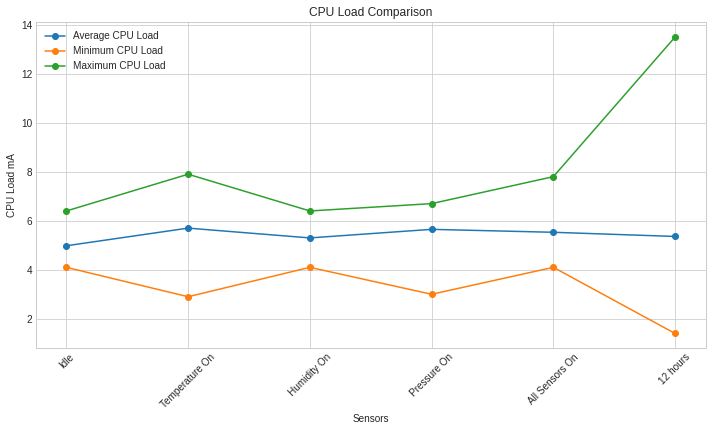

In [25]:
plt.figure(figsize=(12, 6))
x = range(len(sensor_names))
plt.plot(x, cpu_loads_avg, label='Average CPU Load', marker='o')
plt.plot(x, cpu_loads_min, label='Minimum CPU Load', marker='o')
plt.plot(x, cpu_loads_max, label='Maximum CPU Load', marker='o')

plt.xlabel('Sensors')
plt.ylabel('CPU Load mA')
plt.title('CPU Load Comparison')
plt.xticks(x, sensor_names, rotation=45)
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()

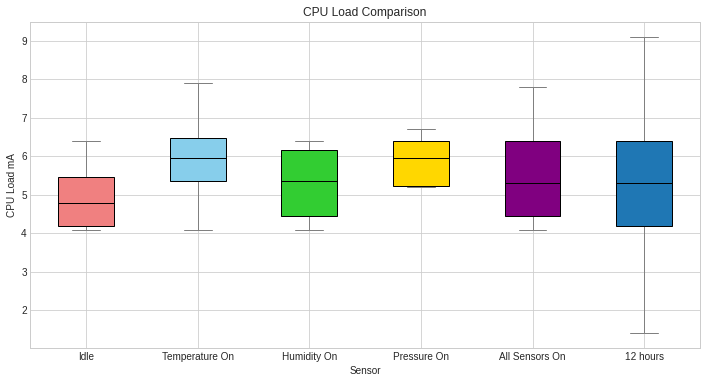

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np

def read_cpu_load(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        cpu_loads = [float(line.strip().split('CPU_load:')[1].strip('%')) for line in lines]
    return cpu_loads

file_names = ['idle1.txt','temp1.txt', 'humidity1.txt', 'pressure1.txt', 'all1.txt','load_data_all.txt']
sensor_names = ['Idle', 'Temperature On', 'Humidity On', 'Pressure On', 'All Sensors On','12 hours']

cpu_loads = []

for file_name in file_names:
    cpu_loads.append(read_cpu_load(file_name))

plt.figure(figsize=(12, 6))

# Define colors for the box plots
colors = ['lightcoral', 'skyblue', 'limegreen', 'gold', 'purple']

# Create box plots with custom colors
box_plot = plt.boxplot(cpu_loads, labels=sensor_names, patch_artist=True, showfliers=False)

# Set colors for each box plot
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# Set colors for median lines
for median in box_plot['medians']:
    median.set(color='black')

# Set colors for whiskers and caps
for whisker, cap in zip(box_plot['whiskers'], box_plot['caps']):
    whisker.set(color='gray')
    cap.set(color='gray')

plt.xlabel('Sensor')
plt.ylabel('CPU Load mA')
plt.title('CPU Load Comparison')
plt.grid(True)
plt.show()


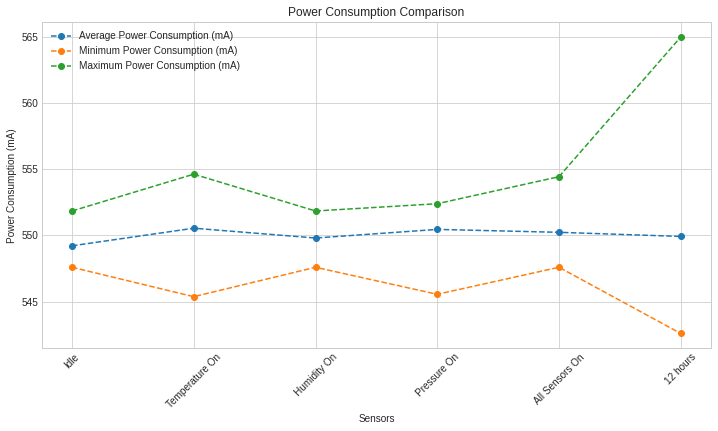

In [19]:
plt.figure(figsize=(12, 6))
x = range(len(sensor_names))

# Average, Minimum, and Maximum power consumption
plt.plot(x, estimated_powers_avg, label='Average Power Consumption (mA)', linestyle='--', marker='o')
plt.plot(x, estimated_powers_min, label='Minimum Power Consumption (mA)', linestyle='--', marker='o')
plt.plot(x, estimated_powers_max, label='Maximum Power Consumption (mA)', linestyle='--', marker='o')

plt.xlabel('Sensors')
plt.ylabel('Power Consumption (mA)')
plt.title('Power Consumption Comparison')
plt.xticks(x, sensor_names, rotation=45)
plt.legend()
plt.grid(True)  # Add gridlines
plt.show()

In [14]:
data_all = read_cpu_load("load_data_all.txt")
hours = len(data_all) / 6  # Each data point is collected every 10 minutes (6 data points per hour)

In [15]:
def analyze_changes(data, interval):
    analyzed_data = []
    num_points = len(data)
    num_intervals = num_points // interval

    for i in range(num_intervals):
        start_index = i * interval
        end_index = (i + 1) * interval
        interval_data = data[start_index:end_index]
        change = interval_data[-1] - interval_data[0]
        analyzed_data.append(change)

    return analyzed_data

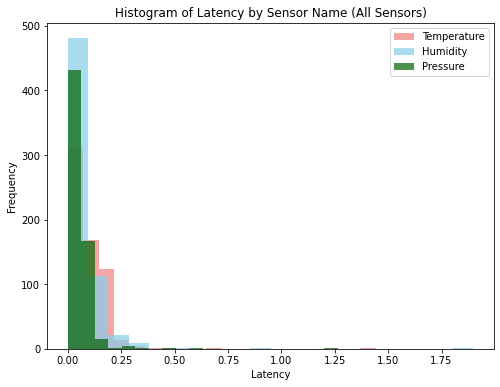

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file
df = pd.read_csv("latenciesall.csv")

# Filter the data based on the sensor ID
temperature_data = df[df["sensor_id"] == "temperature"]["latency"]
humidity_data = df[df["sensor_id"] == "humidity"]["latency"]
pressure_data = df[df["sensor_id"] == "pressure"]["latency"]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_data, bins=20, alpha=0.7, color='lightcoral', label="Temperature")
plt.hist(humidity_data, bins=20, alpha=0.7, color='skyblue', label="Humidity")
plt.hist(pressure_data, bins=20, alpha=0.7, color='darkgreen', label="Pressure")

# Set plot labels and title
plt.xlabel("Latency")
plt.ylabel("Frequency")
plt.title("Histogram of Latency by Sensor Name (All Sensors)")
plt.legend()

# Display the plot
plt.show()


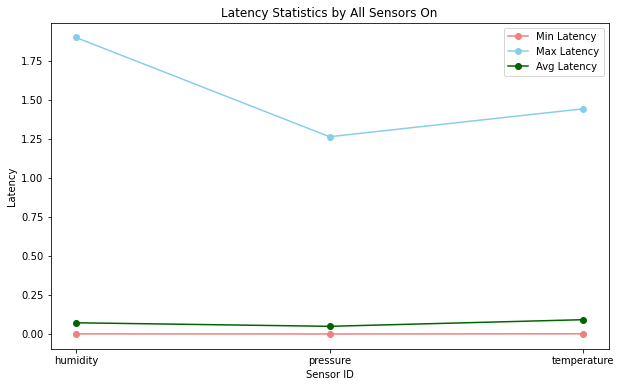

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file
df = pd.read_csv("latenciesall.csv")

# Group the data by sensor ID and calculate the min, max, and average latencies
grouped_data = df.groupby("sensor_id")["latency"].agg(['min', 'max', 'mean'])

# Extract the sensor IDs and latency statistics
sensor_ids = grouped_data.index
min_latencies = grouped_data['min']
max_latencies = grouped_data['max']
avg_latencies = grouped_data['mean']

# Create a range of x-values for the plot
x = range(len(sensor_ids))

# Create line plots for minimum, maximum, and average latencies
plt.figure(figsize=(10, 6))

# Plot for minimum latencies
plt.plot(x, min_latencies, label="Min Latency", marker='o', linestyle='-', color='lightcoral')

# Plot for maximum latencies
plt.plot(x, max_latencies, label="Max Latency", marker='o', linestyle='-', color='skyblue')

# Plot for average latencies
plt.plot(x, avg_latencies, label="Avg Latency", marker='o', linestyle='-', color='darkgreen')

# Set x-axis tick labels
plt.xticks(x, sensor_ids)

# Set plot labels and title
plt.xlabel("Sensor ID")
plt.ylabel("Latency")
plt.title("Latency Statistics by All Sensors On")

# Add legend
plt.legend()

# Display the plot
plt.show()


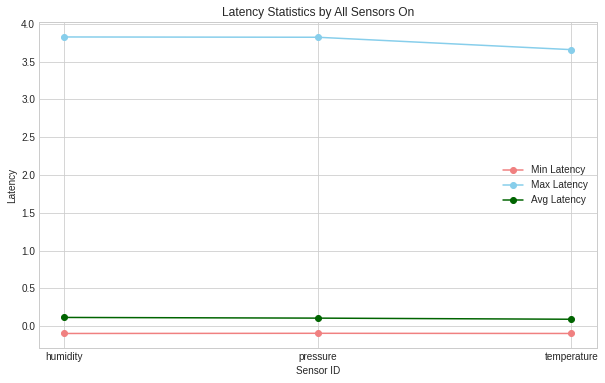

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file
df = pd.read_csv("latencies12.csv")

# Group the data by sensor ID and calculate the min, max, and average latencies
grouped_data = df.groupby("sensor_id")["latency"].agg(['min', 'max', 'mean'])

# Extract the sensor IDs and latency statistics
sensor_ids = grouped_data.index
min_latencies = grouped_data['min']
max_latencies = grouped_data['max']
avg_latencies = grouped_data['mean']

# Create a range of x-values for the plot
x = range(len(sensor_ids))

# Create line plots for minimum, maximum, and average latencies
plt.figure(figsize=(10, 6))

# Plot for minimum latencies
plt.plot(x, min_latencies, label="Min Latency", marker='o', linestyle='-', color='lightcoral')

# Plot for maximum latencies
plt.plot(x, max_latencies, label="Max Latency", marker='o', linestyle='-', color='skyblue')

# Plot for average latencies
plt.plot(x, avg_latencies, label="Avg Latency", marker='o', linestyle='-', color='darkgreen')

# Set x-axis tick labels
plt.xticks(x, sensor_ids)

# Set plot labels and title
plt.xlabel("Sensor ID")
plt.ylabel("Latency")
plt.title("Latency Statistics by All Sensors On")

# Add legend
plt.legend()

# Display the plot
plt.show()


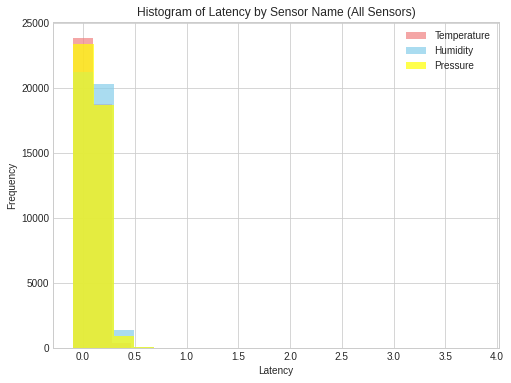

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file
df = pd.read_csv("latencies12.csv")

# Filter the data based on the sensor ID
temperature_data = df[df["sensor_id"] == "temperature"]["latency"]
humidity_data = df[df["sensor_id"] == "humidity"]["latency"]
pressure_data = df[df["sensor_id"] == "pressure"]["latency"]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_data, bins=20, alpha=0.7, color='lightcoral', label="Temperature")
plt.hist(humidity_data, bins=20, alpha=0.7, color='skyblue', label="Humidity")
plt.hist(pressure_data, bins=20, alpha=0.7, color='yellow', label="Pressure")

# Set plot labels and title
plt.xlabel("Latency")
plt.ylabel("Frequency")
plt.title("Histogram of Latency by Sensor Name (All Sensors)")
plt.legend()

# Display the plot
plt.show()


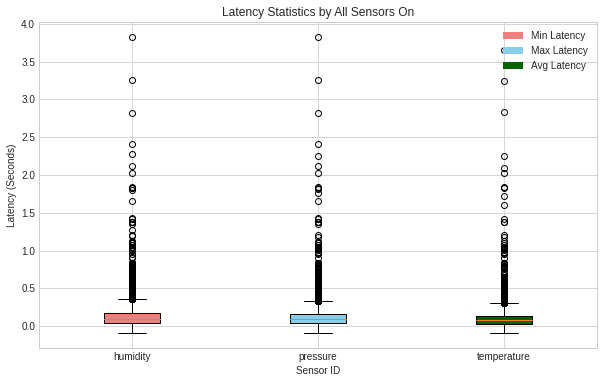

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file
df = pd.read_csv("latencies12.csv")

# Group the data by sensor ID and calculate the latency statistics
grouped_data = df.groupby("sensor_id")["latency"].agg(['min', 'max', 'mean'])

# Extract the sensor IDs and latency statistics
sensor_ids = grouped_data.index
min_latencies = grouped_data['min']
max_latencies = grouped_data['max']
avg_latencies = grouped_data['mean']

# Create a list of latency data for each sensor
latency_data = [df[df["sensor_id"] == sid]["latency"] for sid in sensor_ids]

# Create a figure and axis for the box plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot
box = ax.boxplot(latency_data, patch_artist=True)

# Set box plot colors
colors = ['lightcoral', 'skyblue', 'darkgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set x-axis tick labels
ax.set_xticklabels(sensor_ids)

# Set plot labels and title
ax.set_xlabel("Sensor ID")
ax.set_ylabel("Latency (Seconds)")
ax.set_title("Latency Statistics by All Sensors On")

# Add legend
legend_labels = ['Min Latency', 'Max Latency', 'Avg Latency']
legend_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
ax.legend(legend_patches, legend_labels)

# Display the plot
plt.show()


In [87]:
import sqlite3

# Establish a connection to the database file
conn = sqlite3.connect('database2.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a query to retrieve data from the table
cursor.execute('SELECT * FROM measurements')

# Fetch all the rows from the result set
rows = cursor.fetchall()

# Create separate arrays to store the data for each sensor
temperature_data = []
humidity_data = []
pressure_data = []

# Process each row of data
for row in rows:
    sensor_id, sensor_type, value, timestamp = row
    if sensor_type == 'temperature':
        temperature_data.append(value)
    elif sensor_type == 'humidity':
        humidity_data.append(value)
    elif sensor_type == 'pressure':
        pressure_data.append(value)

# Compare the latest value with the previous value for each sensor
if len(temperature_data) > 1:
    latest_temperature = temperature_data[-1]
    previous_temperature = temperature_data[-2]
    if abs(latest_temperature - previous_temperature) > 1:
        print("Assumption: Temperature - The difference between the latest value and the previous value is larger than +-2.")

if len(humidity_data) > 1:
    latest_humidity = humidity_data[-1]
    previous_humidity = humidity_data[-2]
    if abs(latest_humidity - previous_humidity) > 1:
        print("Assumption: Humidity - The difference between the latest value and the previous value is larger than +-2.")

if len(pressure_data) > 1:
    latest_pressure = pressure_data[-1]
    previous_pressure = pressure_data[-2]
    if abs(latest_pressure - previous_pressure) > 1:
        print("Assumption: Pressure - The difference between the latest value and the previous value is larger than +-2.")

# Close the cursor and the database connection
cursor.close()
conn.close()


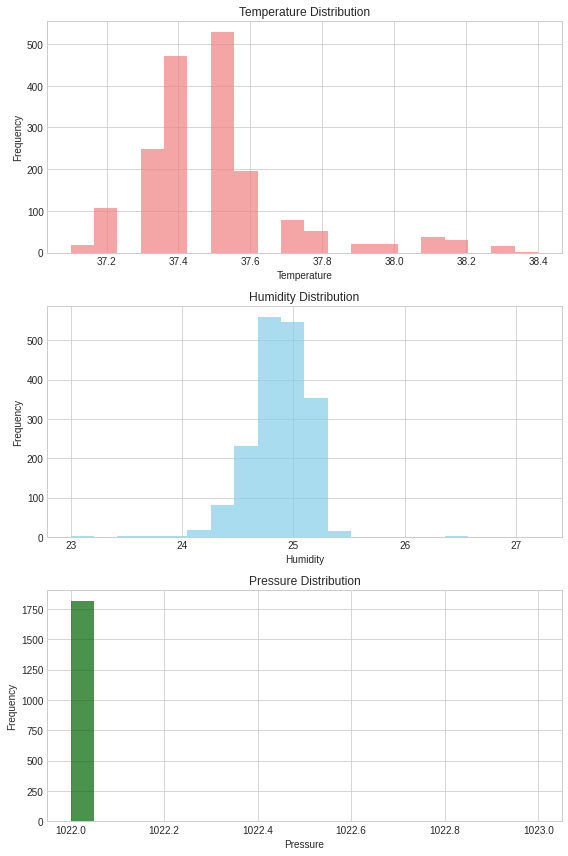

Temperature Data Length: 1819
Humidity Data Length: 1818
Pressure Data Length: 1817


In [88]:

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create a figure and axis for the subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot histogram for temperature data
axs[0].hist(temperature_data, bins=20, alpha=0.7, color='lightcoral')
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Temperature Distribution')

# Plot histogram for humidity data
axs[1].hist(humidity_data, bins=20, alpha=0.7, color='skyblue')
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Humidity Distribution')

# Plot histogram for pressure data
axs[2].hist(pressure_data, bins=20, alpha=0.7, color='darkgreen')
axs[2].set_xlabel('Pressure')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Pressure Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

# Print the length of the temperature data
print(f"Temperature Data Length: {len(temperature_data)}")

# Print the length of the humidity data
print(f"Humidity Data Length: {len(humidity_data)}")

# Print the length of the pressure data
print(f"Pressure Data Length: {len(pressure_data)}")



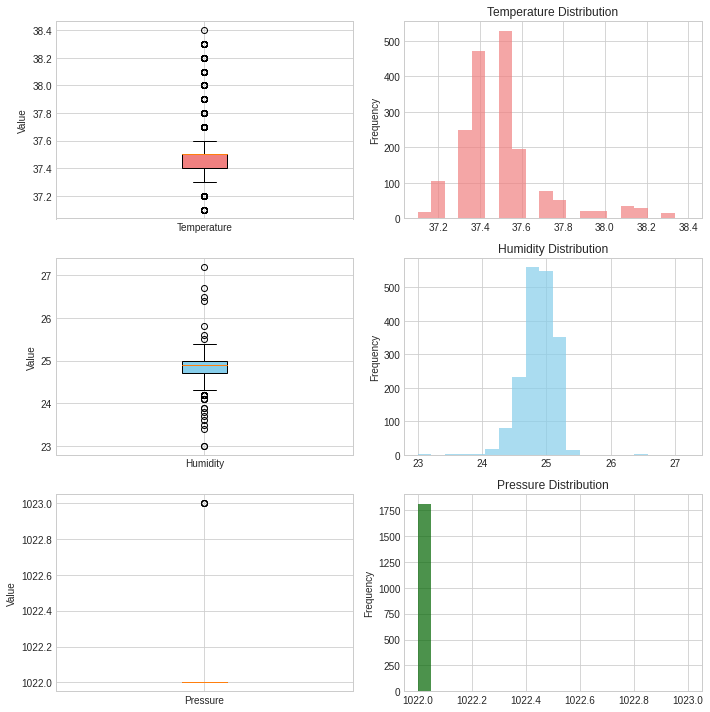

Temperature Data Length: 1819
Humidity Data Length: 1818
Pressure Data Length: 1817


In [85]:
import sqlite3
import matplotlib.pyplot as plt

# Establish a connection to the database file
conn = sqlite3.connect('database2.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a query to retrieve data from the table
cursor.execute('SELECT * FROM measurements')

# Fetch all the rows from the result set
rows = cursor.fetchall()

# Create separate arrays to store the data for each sensor
temperature_data = []
humidity_data = []
pressure_data = []

# Process each row of data
for row in rows:
    sensor_id, sensor_type, value, timestamp = row
    if sensor_type == 'temperature':
        temperature_data.append(value)
    elif sensor_type == 'humidity':
        humidity_data.append(value)
    elif sensor_type == 'pressure':
        pressure_data.append(value)

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create a figure and axis for the subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Create the box plots for temperature data
axs[0, 0].boxplot(temperature_data, patch_artist=True, labels=['Temperature'], boxprops=dict(facecolor='lightcoral'))
axs[0, 1].hist(temperature_data, bins=20, alpha=0.7, color='lightcoral')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Temperature Distribution')

# Create the box plots for humidity data
axs[1, 0].boxplot(humidity_data, patch_artist=True, labels=['Humidity'], boxprops=dict(facecolor='skyblue'))
axs[1, 1].hist(humidity_data, bins=20, alpha=0.7, color='skyblue')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Humidity Distribution')

# Create the box plots for pressure data
axs[2, 0].boxplot(pressure_data, patch_artist=True, labels=['Pressure'], boxprops=dict(facecolor='darkgreen'))
axs[2, 1].hist(pressure_data, bins=20, alpha=0.7, color='darkgreen')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].set_title('Pressure Distribution')

# Set the y-axis label for box plots
for i in range(3):
    axs[i, 0].set_ylabel('Value')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

# Print the length of the temperature data
print(f"Temperature Data Length: {len(temperature_data)}")

# Print the length of the humidity data
print(f"Humidity Data Length: {len(humidity_data)}")

# Print the length of the pressure data
print(f"Pressure Data Length: {len(pressure_data)}")

# Close the cursor and the database connection
cursor.close()
conn.close()
